In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

870


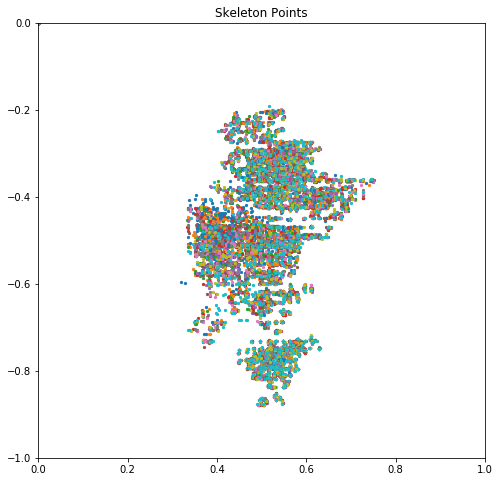

In [2]:
BASE_DIR = "D:\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\openpose-1.5.0-binaries-win64-gpu-python-flir-3d_recommended\DatasetPosePerDancer\Develope"

#run through each dancer folder and plot the coordinates
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                #print(file_path)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                sc = ax.scatter(x,y, s=5)
                count+=1
plotCoordinates()
print(count)

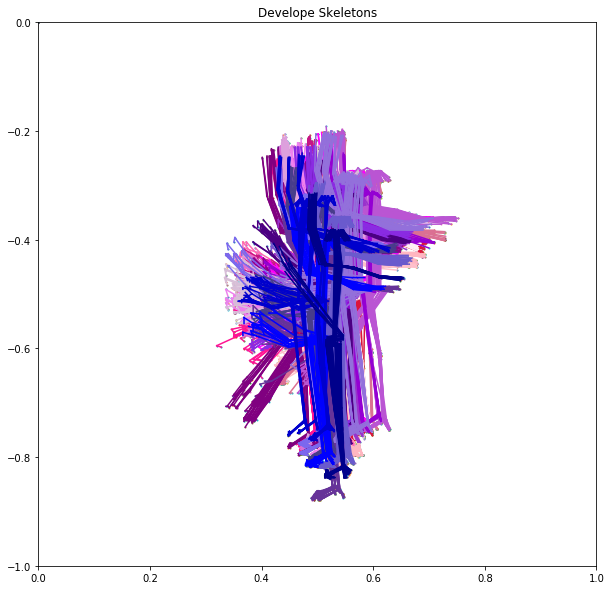

In [12]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']
allXList =[]
allYList = []
dancerNum = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Develope Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    for subdir, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(BASE_DIR,subdir,file)
                raw_img_json = pd.read_json(file_path)
                img_keypoints_list = raw_img_json.people[0]['pose_keypoints_2d']
                x = img_keypoints_list[0::3]
                allXList.append(x)
                posY = img_keypoints_list[1::3]
                y = [-y for y in posY]
                allYList.append(y)
                sc = ax.scatter(x,y, s=1)
                for bone in bones:
                    #Remove the 0,0 xy coordinates plotting
                    if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                        #print("zero values for joint: ",x.index(x[bone[0]]))
                        #print("zero values for joint: ",x.index(x[bone[1]]))
                        continue
                    #ax.plot([x_values],[y_values])
                    ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        dancerNum+=1
plotSkeletons()

In [4]:
np.save('allDevelopeXList.npy', allXList)
np.save('allDevelopeYList.npy', allYList)

In [5]:
xloaded = np.load('allDevelopeXList.npy')
print(xloaded)
print(len(xloaded))
yloaded = np.load('allDevelopeYList.npy')
print(yloaded)
print(len(yloaded))

[[0.558355 0.548215 0.521641 ... 0.529862 0.533845 0.57065 ]
 [0.558419 0.548268 0.521621 ... 0.529819 0.531788 0.570624]
 [0.560402 0.548297 0.523673 ... 0.529845 0.53185  0.570668]
 ...
 [0.537951 0.542024 0.515507 ... 0.517519 0.517566 0.554335]
 [0.537953 0.54203  0.515529 ... 0.515538 0.515599 0.556325]
 [0.533944 0.537958 0.513521 ... 0.515495 0.515493 0.55232 ]]
870
[[-0.336228 -0.401691 -0.398775 ... -0.80217  -0.796715 -0.796555]
 [-0.336234 -0.401708 -0.3988   ... -0.810249 -0.799473 -0.796755]
 [-0.336275 -0.404226 -0.398906 ... -0.807587 -0.799381 -0.796689]
 ...
 [-0.396162 -0.447993 -0.445298 ... -0.83207  -0.823919 -0.826624]
 [-0.396174 -0.447963 -0.445276 ... -0.832132 -0.826626 -0.829408]
 [-0.396177 -0.447974 -0.445241 ... -0.834846 -0.829382 -0.832143]]
870


In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
print(sumXList)
print(sumYList)

#Get the average: sum/count
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
print(avgXList)
print(avgYList)

[467.8316859999999, 466.5897330000003, 443.74140700000044, 422.4022529999993, 421.9722709999998, 489.93344700000006, 533.6617699999997, 569.8569450000001, 464.16581699999966, 453.0479010000004, 465.45580599999954, 475.8218710000004, 474.311014, 436.88816600000047, 388.5712310000001, 461.81873399999967, 474.2811509999998, 440.4690900000007, 468.695062, 355.98523300000045, 339.07833999999997, 381.0410419999998, 447.04384499999964, 449.43682200000035, 481.69059099999976]
[-284.46371899999986, -336.16582899999963, -332.9269230000001, -275.9602060000002, -219.61519799999988, -339.94070000000045, -354.92020599999995, -358.6991869999999, -451.9519839999994, -451.88233699999995, -559.5351850000005, -659.0998119999998, -452.34722000000005, -470.8438490000005, -485.7181030000005, -278.08641699999987, -278.0202089999999, -283.4934730000003, -282.146129, -478.45508600000016, -460.3889679999998, -484.22091399999977, -676.580681, -671.9915839999995, -670.3544050000002]
[0.5377375701149424, 0.5363100

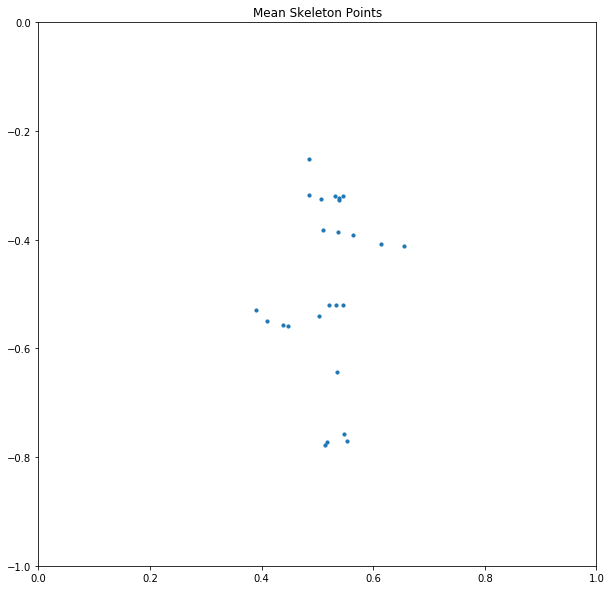

In [7]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
            
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics


In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY) 

Standard Deviations of X values: [0.031895488210815025, 0.032049573066633044, 0.03233448846736603, 0.03341122200009882, 0.03529756897491028, 0.03153005773193087, 0.031927117581854125, 0.03436374145609893, 0.03200014767253106, 0.032519492252757264, 0.03314870746746065, 0.03452239635220206, 0.03209416555154968, 0.0342576263360144, 0.06894939212000396, 0.03182764614901207, 0.031855165697107696, 0.08935121223430698, 0.10135045150616952, 0.08504469304289797, 0.12873767124662922, 0.07243284974476161, 0.033987848385829876, 0.03434812642830182, 0.03899799035902257]
Standard Deviations of Y values: [0.03442503777279879, 0.03227776679139496, 0.032306921481276195, 0.03390426796618653, 0.03620057955270819, 0.031994307703870836, 0.03235921221129918, 0.032588981439683494, 0.03208433304208867, 0.031617185010191944, 0.03242940916456105, 0.03816727832362201, 0.032956283930851156, 0.06676725483606341, 0.12557005942401042, 0.03482676453501582, 0.03489657331339673, 0.06367090686556602, 0.06769073723028587

In [10]:
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('DevelopeStdDevX.npy', standardDeviationX)
np.save('DevelopeStdDevY.npy', standardDeviationY)
np.save('DevelopeMeanX.npy', avgXList)
np.save('DevelopeMeanY.npy', avgYList)